<a href="https://colab.research.google.com/github/charan0416/numpy_pandas/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
cars = pd.read_csv('/USA_cars_datasets.csv')

In [9]:
cars

Unnamed: 0  price      brand    model  year   title_status   mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1              1   2899       ford       se  2011  clean vehicle  190552.0   
2              2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3              3  25000       ford     door  2014  clean vehicle   64146.0   
4              4  27700  chevrolet     1500  2018  clean vehicle    6654.0   
...          ...    ...        ...      ...   ...            ...       ...   
2494        2494   7800     nissan    versa  2019  clean vehicle   23609.0   
2495        2495   9200     nissan    versa  2018  clean vehicle   34553.0   
2496        2496   9200     nissan    versa  2018  clean vehicle   31594.0   
2497        2497   9200     nissan    versa  2018  clean vehicle   32557.0   
2498        2498   9200     nissan    versa  2018  clean vehicle   31371.0   

       color                  vin        lot       state country  \
0      black    jtezu11f88k007763  159348797  new jersey     usa   
1     silver    2fmdk3gc4bbb02217  166951262   tennessee     usa   
2     silver    3c4pdcgg5jt346413  167655728     georgia     usa   
3       blue    1ftfw1et4efc23745  167753855    virginia     usa   
4        red    3gcpcrec2jg473991  167763266     florida     usa   
...      ...                  ...        ...         ...     ...   
2494     red    3n1cn7ap9kl880319  167722715  california     usa   
2495  silver    3n1cn7ap5jl884088  167762225     florida     usa   
2496  silver    3n1cn7ap9jl884191  167762226     florida     usa   
2497   black    3n1cn7ap3jl883263  167762227     florida     usa   
2498  silver    3n1cn7ap4jl884311  167762228     florida     usa   

          condition  
0      10 days left  
1       6 days left  
2       2 days left  
3     22 hours left  
4     22 hours left  
...             ...  
2494    1 days left  
2495  21 hours left  
2496  21 hours left  
2497    2 days left  
2498  21 hours left  

[2499 rows x 13 columns]

In [95]:
cars.size

TypeError: 'int' object is not callable

In [12]:
cars.shape

(2499, 13)

In [25]:
del cars['mileage']

In [27]:
del cars['lot']

In [29]:
del cars['state']

In [30]:
del cars['color']

In [31]:
del cars['condition']

In [32]:
del cars['title_status']

In [35]:
cars.info

<bound method DataFrame.info of       Unnamed: 0  price      brand    model  year country
0              0   6300     toyota  cruiser  2008     usa
1              1   2899       ford       se  2011     usa
2              2   5350      dodge      mpv  2018     usa
3              3  25000       ford     door  2014     usa
4              4  27700  chevrolet     1500  2018     usa
...          ...    ...        ...      ...   ...     ...
2494        2494   7800     nissan    versa  2019     usa
2495        2495   9200     nissan    versa  2018     usa
2496        2496   9200     nissan    versa  2018     usa
2497        2497   9200     nissan    versa  2018     usa
2498        2498   9200     nissan    versa  2018     usa

[2499 rows x 6 columns]>

In [33]:
cars

Unnamed: 0  price      brand    model  year country
0              0   6300     toyota  cruiser  2008     usa
1              1   2899       ford       se  2011     usa
2              2   5350      dodge      mpv  2018     usa
3              3  25000       ford     door  2014     usa
4              4  27700  chevrolet     1500  2018     usa
...          ...    ...        ...      ...   ...     ...
2494        2494   7800     nissan    versa  2019     usa
2495        2495   9200     nissan    versa  2018     usa
2496        2496   9200     nissan    versa  2018     usa
2497        2497   9200     nissan    versa  2018     usa
2498        2498   9200     nissan    versa  2018     usa

[2499 rows x 6 columns]

from matplotlib import pyplot as plt
cars['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cars.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
cars['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
cars.describe

<bound method NDFrame.describe of       Unnamed: 0  price      brand    model  year country
0              0   6300     toyota  cruiser  2008     usa
1              1   2899       ford       se  2011     usa
2              2   5350      dodge      mpv  2018     usa
3              3  25000       ford     door  2014     usa
4              4  27700  chevrolet     1500  2018     usa
...          ...    ...        ...      ...   ...     ...
2494        2494   7800     nissan    versa  2019     usa
2495        2495   9200     nissan    versa  2018     usa
2496        2496   9200     nissan    versa  2018     usa
2497        2497   9200     nissan    versa  2018     usa
2498        2498   9200     nissan    versa  2018     usa

[2499 rows x 6 columns]>

In [37]:
cars.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'country'], dtype='object')

In [38]:
del cars['Unnamed: 0']

In [39]:
cars

price      brand    model  year country
0      6300     toyota  cruiser  2008     usa
1      2899       ford       se  2011     usa
2      5350      dodge      mpv  2018     usa
3     25000       ford     door  2014     usa
4     27700  chevrolet     1500  2018     usa
...     ...        ...      ...   ...     ...
2494   7800     nissan    versa  2019     usa
2495   9200     nissan    versa  2018     usa
2496   9200     nissan    versa  2018     usa
2497   9200     nissan    versa  2018     usa
2498   9200     nissan    versa  2018     usa

[2499 rows x 5 columns]

from matplotlib import pyplot as plt
cars['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cars.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
cars['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [40]:
cars.rename(columns={'brand':'make'}, inplace= True)

In [41]:
cars

price       make    model  year country
0      6300     toyota  cruiser  2008     usa
1      2899       ford       se  2011     usa
2      5350      dodge      mpv  2018     usa
3     25000       ford     door  2014     usa
4     27700  chevrolet     1500  2018     usa
...     ...        ...      ...   ...     ...
2494   7800     nissan    versa  2019     usa
2495   9200     nissan    versa  2018     usa
2496   9200     nissan    versa  2018     usa
2497   9200     nissan    versa  2018     usa
2498   9200     nissan    versa  2018     usa

[2499 rows x 5 columns]

from matplotlib import pyplot as plt
cars['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cars.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
cars['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [44]:
cars.loc[1:2100,'make']

1            ford
2           dodge
3            ford
4       chevrolet
5           dodge
          ...    
2096         ford
2097         ford
2098         ford
2099         ford
2100         ford
Name: make, Length: 2100, dtype: object

In [45]:
cars

price       make    model  year country
0      6300     toyota  cruiser  2008     usa
1      2899       ford       se  2011     usa
2      5350      dodge      mpv  2018     usa
3     25000       ford     door  2014     usa
4     27700  chevrolet     1500  2018     usa
...     ...        ...      ...   ...     ...
2494   7800     nissan    versa  2019     usa
2495   9200     nissan    versa  2018     usa
2496   9200     nissan    versa  2018     usa
2497   9200     nissan    versa  2018     usa
2498   9200     nissan    versa  2018     usa

[2499 rows x 5 columns]

from matplotlib import pyplot as plt
cars['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cars.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
cars['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [51]:
price = cars['price'].sum()

In [52]:
print(price)

46900411


In [83]:
cars.loc[cars['make'] == 'toyota',]

price    make    model  year country     fav
0   6300  toyota  cruiser  2008     usa  charan

In [63]:
cars.loc[cars['make']== 'ford']

price  make   model  year country
1      2899  ford      se  2011     usa
3     25000  ford    door  2014     usa
9      5250  ford     mpv  2017     usa
14    20700  ford    door  2013     usa
18     5210  ford     mpv  2017     usa
...     ...   ...     ...   ...     ...
2199  13800  ford  fusion  2019     usa
2200  56000  ford     srw  2018     usa
2201  13800  ford  fusion  2019     usa
2202  45800  ford     srw  2018     usa
2203  13800  ford  fusion  2019     usa

[1235 rows x 5 columns]

from matplotlib import pyplot as plt
_df_46['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_49.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_50.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_51['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [67]:
cars.iloc[1:200,4]

1       usa
2       usa
3       usa
4       usa
5       usa
       ... 
195     usa
196     usa
197     usa
198     usa
199     usa
Name: country, Length: 199, dtype: object

In [72]:
cars.loc[cars['year'] >  2010]

price       make  model  year country
1      2899       ford     se  2011     usa
2      5350      dodge    mpv  2018     usa
3     25000       ford   door  2014     usa
4     27700  chevrolet   1500  2018     usa
5      5700      dodge    mpv  2018     usa
...     ...        ...    ...   ...     ...
2494   7800     nissan  versa  2019     usa
2495   9200     nissan  versa  2018     usa
2496   9200     nissan  versa  2018     usa
2497   9200     nissan  versa  2018     usa
2498   9200     nissan  versa  2018     usa

[2396 rows x 5 columns]

from matplotlib import pyplot as plt
_df_36['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_38.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_42['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [73]:
cars['fav'] = 'charan'

In [74]:
cars

price       make    model  year country     fav
0      6300     toyota  cruiser  2008     usa  charan
1      2899       ford       se  2011     usa  charan
2      5350      dodge      mpv  2018     usa  charan
3     25000       ford     door  2014     usa  charan
4     27700  chevrolet     1500  2018     usa  charan
...     ...        ...      ...   ...     ...     ...
2494   7800     nissan    versa  2019     usa  charan
2495   9200     nissan    versa  2018     usa  charan
2496   9200     nissan    versa  2018     usa  charan
2497   9200     nissan    versa  2018     usa  charan
2498   9200     nissan    versa  2018     usa  charan

[2499 rows x 6 columns]

from matplotlib import pyplot as plt
cars['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cars.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cars.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
cars['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cars['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cars['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cars, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [76]:
cars.sort_values('year')

price       make    model  year country     fav
32    29800  chevrolet   camaro  1973     usa  charan
405      25       ford     door  1984     usa  charan
545       0        gmc     door  1993     usa  charan
322       0       ford  chassis  1994     usa  charan
362      25       ford   pickup  1994     usa  charan
...     ...        ...      ...   ...     ...     ...
1676  23400       ford   fusion  2020     usa  charan
1642  20600       ford   fusion  2020     usa  charan
206      25  chevrolet   vehicl  2020     usa  charan
1640  27000       ford  mustang  2020     usa  charan
1638  20000       ford   fusion  2020     usa  charan

[2499 rows x 6 columns]

from matplotlib import pyplot as plt
_df_26['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_32['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [77]:
cars.fillna(50000)

price       make    model  year country     fav
0      6300     toyota  cruiser  2008     usa  charan
1      2899       ford       se  2011     usa  charan
2      5350      dodge      mpv  2018     usa  charan
3     25000       ford     door  2014     usa  charan
4     27700  chevrolet     1500  2018     usa  charan
...     ...        ...      ...   ...     ...     ...
2494   7800     nissan    versa  2019     usa  charan
2495   9200     nissan    versa  2018     usa  charan
2496   9200     nissan    versa  2018     usa  charan
2497   9200     nissan    versa  2018     usa  charan
2498   9200     nissan    versa  2018     usa  charan

[2499 rows x 6 columns]

from matplotlib import pyplot as plt
_df_16['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_22['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='price', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [80]:
cars.rename(columns={'price' : 'amount'})

amount       make    model  year country     fav
0       6300     toyota  cruiser  2008     usa  charan
1       2899       ford       se  2011     usa  charan
2       5350      dodge      mpv  2018     usa  charan
3      25000       ford     door  2014     usa  charan
4      27700  chevrolet     1500  2018     usa  charan
...      ...        ...      ...   ...     ...     ...
2494    7800     nissan    versa  2019     usa  charan
2495    9200     nissan    versa  2018     usa  charan
2496    9200     nissan    versa  2018     usa  charan
2497    9200     nissan    versa  2018     usa  charan
2498    9200     nissan    versa  2018     usa  charan

[2499 rows x 6 columns]

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='amount', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='amount', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='year', y='country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [84]:
cars.count()

price      2499
make       2499
model      2499
year       2499
country    2499
fav        2499
dtype: int64

In [92]:
cars.dtypes

price       int64
make       object
model      object
year        int64
country    object
fav        object
dtype: object

In [94]:
cars.memory_usage()

Index        132
price      19992
make       19992
model      19992
year       19992
country    19992
fav        19992
dtype: int64

In [96]:
cars.drop_duplicates

<bound method DataFrame.drop_duplicates of       price       make    model  year country     fav
0      6300     toyota  cruiser  2008     usa  charan
1      2899       ford       se  2011     usa  charan
2      5350      dodge      mpv  2018     usa  charan
3     25000       ford     door  2014     usa  charan
4     27700  chevrolet     1500  2018     usa  charan
...     ...        ...      ...   ...     ...     ...
2494   7800     nissan    versa  2019     usa  charan
2495   9200     nissan    versa  2018     usa  charan
2496   9200     nissan    versa  2018     usa  charan
2497   9200     nissan    versa  2018     usa  charan
2498   9200     nissan    versa  2018     usa  charan

[2499 rows x 6 columns]>

In [97]:
cars.dropna()

price       make    model  year country     fav
0      6300     toyota  cruiser  2008     usa  charan
1      2899       ford       se  2011     usa  charan
2      5350      dodge      mpv  2018     usa  charan
3     25000       ford     door  2014     usa  charan
4     27700  chevrolet     1500  2018     usa  charan
...     ...        ...      ...   ...     ...     ...
2494   7800     nissan    versa  2019     usa  charan
2495   9200     nissan    versa  2018     usa  charan
2496   9200     nissan    versa  2018     usa  charan
2497   9200     nissan    versa  2018     usa  charan
2498   9200     nissan    versa  2018     usa  charan

[2499 rows x 6 columns]

In [100]:
cars.loc[cars['model']=='versa']

price    make  model  year country     fav
2233   9000  nissan  versa  2019     usa  charan
2236   6400  nissan  versa  2019     usa  charan
2238   7800  nissan  versa  2019     usa  charan
2241   8500  nissan  versa  2019     usa  charan
2242   7300  nissan  versa  2019     usa  charan
2243   5900  nissan  versa  2019     usa  charan
2252   8800  nissan  versa  2018     usa  charan
2254   8800  nissan  versa  2018     usa  charan
2275   7800  nissan  versa  2018     usa  charan
2277   8000  nissan  versa  2018     usa  charan
2287   8000  nissan  versa  2018     usa  charan
2289   8300  nissan  versa  2018     usa  charan
2291   8000  nissan  versa  2018     usa  charan
2293   8000  nissan  versa  2018     usa  charan
2295   7800  nissan  versa  2018     usa  charan
2296   8000  nissan  versa  2018     usa  charan
2298   8000  nissan  versa  2018     usa  charan
2300   7500  nissan  versa  2018     usa  charan
2393   9900  nissan  versa  2019     usa  charan
2404   9500  nissan  versa  2018     usa  charan
2408   9300  nissan  versa  2018     usa  charan
2472   9200  nissan  versa  2018     usa  charan
2474   9200  nissan  versa  2018     usa  charan
2477   9100  nissan  versa  2018     usa  charan
2481   9200  nissan  versa  2018     usa  charan
2483   9200  nissan  versa  2018     usa  charan
2491   9200  nissan  versa  2018     usa  charan
2492   7400  nissan  versa  2019     usa  charan
2493   9200  nissan  versa  2018     usa  charan
2494   7800  nissan  versa  2019     usa  charan
2495   9200  nissan  versa  2018     usa  charan
2496   9200  nissan  versa  2018     usa  charan
2497   9200  nissan  versa  2018     usa  charan
2498   9200  nissan  versa  2018     usa  charan

In [102]:
cars.items()

<generator object DataFrame.items at 0x7957348f1b70>

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB
None

First Few Rows of Dataset:

   Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean

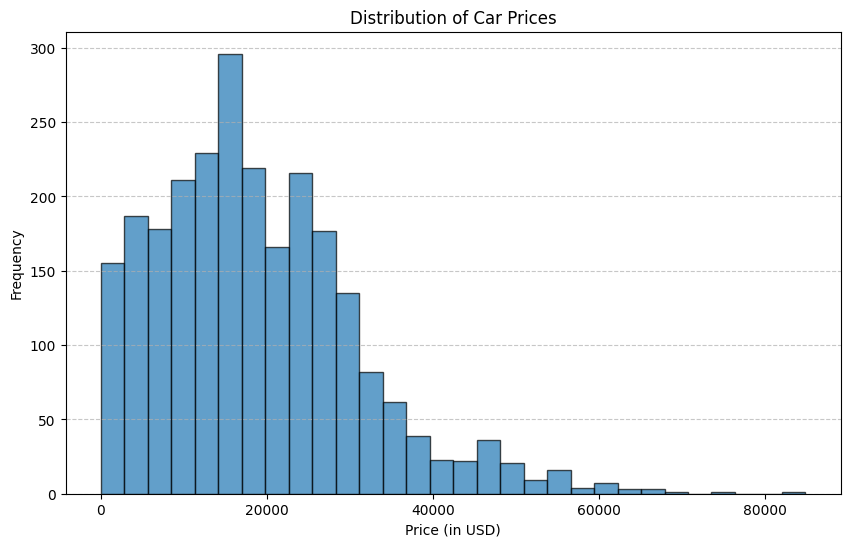

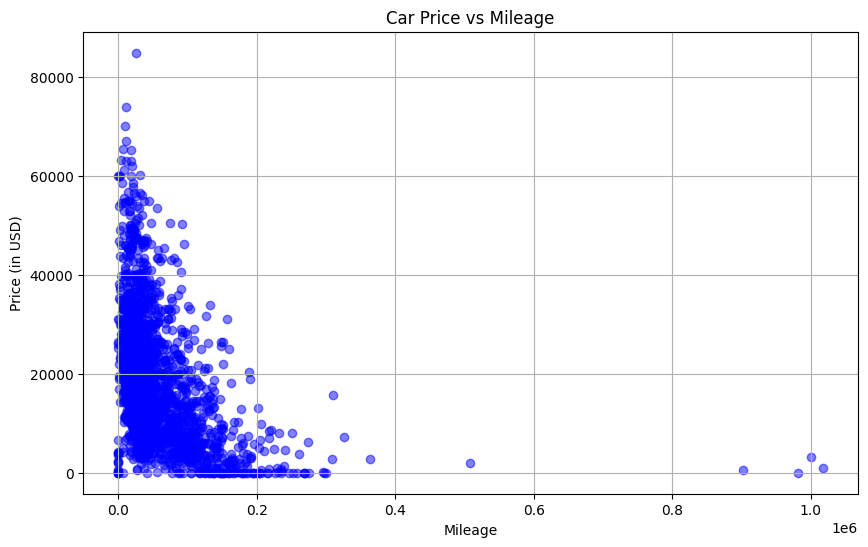

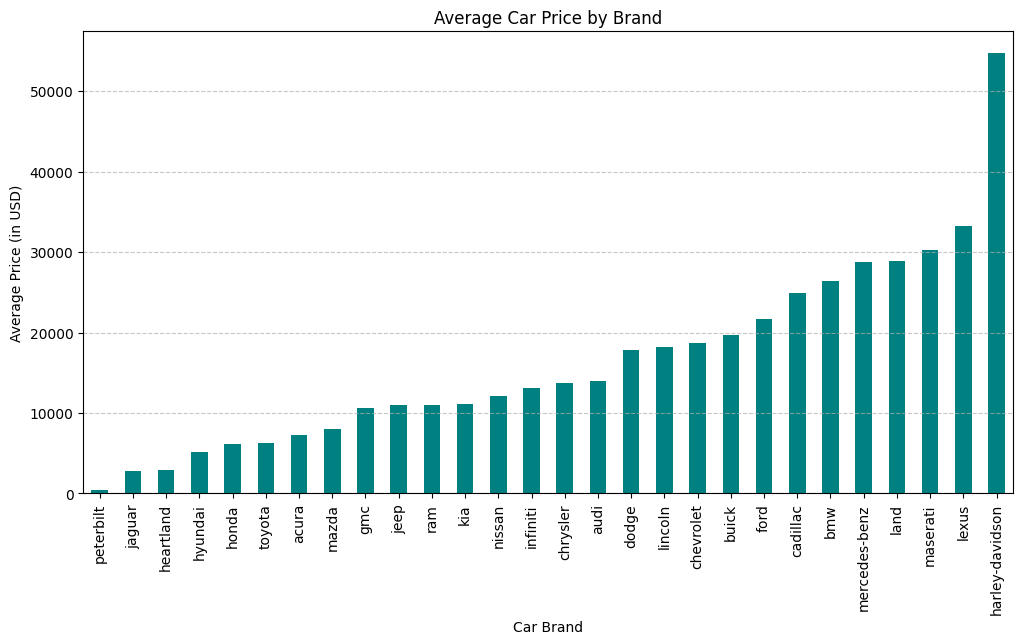

In [4]:

# # Import necessary libraries
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# file_path = "/USA_cars_datasets.csv"  # Replace with your actual file path
# df = pd.read_csv(file_path)

# # Display basic info about the dataset
# print("Dataset Information:\n")
# print(df.info())
# print("\nFirst Few Rows of Dataset:\n")
# print(df.head())


# plt.figure(figsize=(10, 6))
# plt.hist(df["price"], bins=30, edgecolor="black", alpha=0.7)
# plt.xlabel("Price (in USD)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Car Prices")
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.show()


# plt.figure(figsize=(10, 6))
# plt.scatter(df["mileage"], df["price"], alpha=0.5, color="blue")
# plt.xlabel("Mileage")
# plt.ylabel("Price (in USD)")
# plt.title("Car Price vs Mileage")
# plt.grid(True)
# plt.show()


# brand_avg_price = df.groupby("brand")["price"].mean().sort_values()

# plt.figure(figsize=(12, 6))
# brand_avg_price.plot(kind="bar", color="teal")
# plt.xlabel("Car Brand")
# plt.ylabel("Average Price (in USD)")
# plt.title("Average Car Price by Brand")
# plt.xticks(rotation=90)
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.show()


In [11]:
cars.at[5,'year']

np.int64(2018)

In [13]:
cars.iat[5,4]

np.int64(2018)

In [14]:
cars.sort_index()

Unnamed: 0  price      brand    model  year   title_status   mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1              1   2899       ford       se  2011  clean vehicle  190552.0   
2              2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3              3  25000       ford     door  2014  clean vehicle   64146.0   
4              4  27700  chevrolet     1500  2018  clean vehicle    6654.0   
...          ...    ...        ...      ...   ...            ...       ...   
2494        2494   7800     nissan    versa  2019  clean vehicle   23609.0   
2495        2495   9200     nissan    versa  2018  clean vehicle   34553.0   
2496        2496   9200     nissan    versa  2018  clean vehicle   31594.0   
2497        2497   9200     nissan    versa  2018  clean vehicle   32557.0   
2498        2498   9200     nissan    versa  2018  clean vehicle   31371.0   

       color                  vin        lot       state country  \
0      black    jtezu11f88k007763  159348797  new jersey     usa   
1     silver    2fmdk3gc4bbb02217  166951262   tennessee     usa   
2     silver    3c4pdcgg5jt346413  167655728     georgia     usa   
3       blue    1ftfw1et4efc23745  167753855    virginia     usa   
4        red    3gcpcrec2jg473991  167763266     florida     usa   
...      ...                  ...        ...         ...     ...   
2494     red    3n1cn7ap9kl880319  167722715  california     usa   
2495  silver    3n1cn7ap5jl884088  167762225     florida     usa   
2496  silver    3n1cn7ap9jl884191  167762226     florida     usa   
2497   black    3n1cn7ap3jl883263  167762227     florida     usa   
2498  silver    3n1cn7ap4jl884311  167762228     florida     usa   

          condition  
0      10 days left  
1       6 days left  
2       2 days left  
3     22 hours left  
4     22 hours left  
...             ...  
2494    1 days left  
2495  21 hours left  
2496  21 hours left  
2497    2 days left  
2498  21 hours left  

[2499 rows x 13 columns]

In [16]:
cars.loc[cars['state']== 'new jersey']

Unnamed: 0  price   brand     model  year   title_status   mileage  \
0              0   6300  toyota   cruiser  2008  clean vehicle  274117.0   
379          379  17200   honda       van  2016  clean vehicle   72527.0   
401          401  13500     bmw    series  2014  clean vehicle   33542.0   
428          428   5690  nissan       mpv  2017  clean vehicle   42616.0   
440          440  13000     kia  sportage  2017  clean vehicle   71991.0   
...          ...    ...     ...       ...   ...            ...       ...   
2062        2062  14000    ford     doors  2015  clean vehicle   79430.0   
2067        2067  21822    ford     doors  2015  clean vehicle   36041.0   
2084        2084  20159    ford     doors  2015  clean vehicle   45278.0   
2313        2313   9500  nissan    sentra  2018  clean vehicle   42782.0   
2334        2334  12900  nissan      door  2016  clean vehicle   98354.0   

                                 color                  vin        lot  \
0                                black    jtezu11f88k007763  159348797   
379                               gray    5fnrl5h65gb151898  167611321   
401                               blue    wba3d5c51ekx97650  167782815   
428                               blue    5n1at2mv4hc773816  167668377   
440                             silver    kndpn3ac7h7113313  167606881   
...                                ...                  ...        ...   
2062                 magnetic metallic    2fmtk4j88fbb19078  167565107   
2067  white platinum tri-coat metallic    2fmtk4ap1fbc36380  167565117   
2084                      oxford white    2fmtk4j98fbc15642  167565193   
2313                             black    3n1ab7ap3jy262463  167602541   
2334                               red    1n6ad0ev8gn783236  167612818   

           state country      condition  
0     new jersey     usa   10 days left  
379   new jersey     usa   2 hours left  
401   new jersey     usa    2 days left  
428   new jersey     usa  17 hours left  
440   new jersey     usa   2 hours left  
...          ...     ...            ...  
2062  new jersey     usa    9 days left  
2067  new jersey     usa    9 days left  
2084  new jersey     usa    9 days left  
2313  new jersey     usa   2 hours left  
2334  new jersey     usa   2 hours left  

[87 rows x 13 columns]

In [23]:
cars.isnull()

Unnamed: 0  price  brand  model   year  title_status  mileage  color  \
0          False  False  False  False  False         False    False  False   
1          False  False  False  False  False         False    False  False   
2          False  False  False  False  False         False    False  False   
3          False  False  False  False  False         False    False  False   
4          False  False  False  False  False         False    False  False   
...          ...    ...    ...    ...    ...           ...      ...    ...   
2494       False  False  False  False  False         False    False  False   
2495       False  False  False  False  False         False    False  False   
2496       False  False  False  False  False         False    False  False   
2497       False  False  False  False  False         False    False  False   
2498       False  False  False  False  False         False    False  False   

        vin    lot  state  country  condition  
0     False  False  False    False      False  
1     False  False  False    False      False  
2     False  False  False    False      False  
3     False  False  False    False      False  
4     False  False  False    False      False  
...     ...    ...    ...      ...        ...  
2494  False  False  False    False      False  
2495  False  False  False    False      False  
2496  False  False  False    False      False  
2497  False  False  False    False      False  
2498  False  False  False    False      False  

[2499 rows x 13 columns]

In [26]:
cars.last_valid_index

<bound method NDFrame.last_valid_index of       Unnamed: 0  price      brand    model  year   title_status   mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1              1   2899       ford       se  2011  clean vehicle  190552.0   
2              2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3              3  25000       ford     door  2014  clean vehicle   64146.0   
4              4  27700  chevrolet     1500  2018  clean vehicle    6654.0   
...          ...    ...        ...      ...   ...            ...       ...   
2494        2494   7800     nissan    versa  2019  clean vehicle   23609.0   
2495        2495   9200     nissan    versa  2018  clean vehicle   34553.0   
2496        2496   9200     nissan    versa  2018  clean vehicle   31594.0   
2497        2497   9200     nissan    versa  2018  clean vehicle   32557.0   
2498        2498   9200     nissan    versa  2018  clean vehicle   31371.0   

       color         

In [29]:
cars.mul(2)

Unnamed: 0  price               brand           model  year  \
0              0  12600        toyotatoyota  cruisercruiser  4016   
1              2   5798            fordford            sese  4022   
2              4  10700          dodgedodge          mpvmpv  4036   
3              6  50000            fordford        doordoor  4028   
4              8  55400  chevroletchevrolet        15001500  4036   
...          ...    ...                 ...             ...   ...   
2494        4988  15600        nissannissan      versaversa  4038   
2495        4990  18400        nissannissan      versaversa  4036   
2496        4992  18400        nissannissan      versaversa  4036   
2497        4994  18400        nissannissan      versaversa  4036   
2498        4996  18400        nissannissan      versaversa  4036   

                    title_status   mileage         color  \
0     clean vehicleclean vehicle  548234.0    blackblack   
1     clean vehicleclean vehicle  381104.0  silversilver   
2     clean vehicleclean vehicle   79180.0  silversilver   
3     clean vehicleclean vehicle  128292.0      blueblue   
4     clean vehicleclean vehicle   13308.0        redred   
...                          ...       ...           ...   
2494  clean vehicleclean vehicle   47218.0        redred   
2495  clean vehicleclean vehicle   69106.0  silversilver   
2496  clean vehicleclean vehicle   63188.0  silversilver   
2497  clean vehicleclean vehicle   65114.0    blackblack   
2498  clean vehicleclean vehicle   62742.0  silversilver   

                                         vin        lot                 state  \
0       jtezu11f88k007763  jtezu11f88k007763  318697594  new jerseynew jersey   
1       2fmdk3gc4bbb02217  2fmdk3gc4bbb02217  333902524    tennesseetennessee   
2       3c4pdcgg5jt346413  3c4pdcgg5jt346413  335311456        georgiageorgia   
3       1ftfw1et4efc23745  1ftfw1et4efc23745  335507710      virginiavirginia   
4       3gcpcrec2jg473991  3gcpcrec2jg473991  335526532        floridaflorida   
...                                      ...        ...                   ...   
2494    3n1cn7ap9kl880319  3n1cn7ap9kl880319  335445430  californiacalifornia   
2495    3n1cn7ap5jl884088  3n1cn7ap5jl884088  335524450        floridaflorida   
2496    3n1cn7ap9jl884191  3n1cn7ap9jl884191  335524452        floridaflorida   
2497    3n1cn7ap3jl883263  3n1cn7ap3jl883263  335524454        floridaflorida   
2498    3n1cn7ap4jl884311  3n1cn7ap4jl884311  335524456        floridaflorida   

       country                   condition  
0      usa usa    10 days left10 days left  
1      usa usa      6 days left6 days left  
2      usa usa      2 days left2 days left  
3      usa usa  22 hours left22 hours left  
4      usa usa  22 hours left22 hours left  
...        ...                         ...  
2494   usa usa      1 days left1 days left  
2495   usa usa  21 hours left21 hours left  
2496   usa usa  21 hours left21 hours left  
2497   usa usa      2 days left2 days left  
2498   usa usa  21 hours left21 hours left  

[2499 rows x 13 columns]

In [30]:
cars

Unnamed: 0  price      brand    model  year   title_status   mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1              1   2899       ford       se  2011  clean vehicle  190552.0   
2              2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3              3  25000       ford     door  2014  clean vehicle   64146.0   
4              4  27700  chevrolet     1500  2018  clean vehicle    6654.0   
...          ...    ...        ...      ...   ...            ...       ...   
2494        2494   7800     nissan    versa  2019  clean vehicle   23609.0   
2495        2495   9200     nissan    versa  2018  clean vehicle   34553.0   
2496        2496   9200     nissan    versa  2018  clean vehicle   31594.0   
2497        2497   9200     nissan    versa  2018  clean vehicle   32557.0   
2498        2498   9200     nissan    versa  2018  clean vehicle   31371.0   

       color                  vin        lot       state country  \
0      black    jtezu11f88k007763  159348797  new jersey     usa   
1     silver    2fmdk3gc4bbb02217  166951262   tennessee     usa   
2     silver    3c4pdcgg5jt346413  167655728     georgia     usa   
3       blue    1ftfw1et4efc23745  167753855    virginia     usa   
4        red    3gcpcrec2jg473991  167763266     florida     usa   
...      ...                  ...        ...         ...     ...   
2494     red    3n1cn7ap9kl880319  167722715  california     usa   
2495  silver    3n1cn7ap5jl884088  167762225     florida     usa   
2496  silver    3n1cn7ap9jl884191  167762226     florida     usa   
2497   black    3n1cn7ap3jl883263  167762227     florida     usa   
2498  silver    3n1cn7ap4jl884311  167762228     florida     usa   

          condition  
0      10 days left  
1       6 days left  
2       2 days left  
3     22 hours left  
4     22 hours left  
...             ...  
2494    1 days left  
2495  21 hours left  
2496  21 hours left  
2497    2 days left  
2498  21 hours left  

[2499 rows x 13 columns]

In [39]:
cars['price'].sum()

np.int64(46900411)

In [40]:
cars['brand'] == 'cherry'

0       False
1       False
2       False
3       False
4       False
        ...  
2494    False
2495    False
2496    False
2497    False
2498    False
Name: brand, Length: 2499, dtype: bool

In [41]:
cars['brand'] = 'charan'

In [42]:
cars

Unnamed: 0  price   brand    model  year   title_status   mileage  \
0              0   6300  charan  cruiser  2008  clean vehicle  274117.0   
1              1   2899  charan       se  2011  clean vehicle  190552.0   
2              2   5350  charan      mpv  2018  clean vehicle   39590.0   
3              3  25000  charan     door  2014  clean vehicle   64146.0   
4              4  27700  charan     1500  2018  clean vehicle    6654.0   
...          ...    ...     ...      ...   ...            ...       ...   
2494        2494   7800  charan    versa  2019  clean vehicle   23609.0   
2495        2495   9200  charan    versa  2018  clean vehicle   34553.0   
2496        2496   9200  charan    versa  2018  clean vehicle   31594.0   
2497        2497   9200  charan    versa  2018  clean vehicle   32557.0   
2498        2498   9200  charan    versa  2018  clean vehicle   31371.0   

       color                  vin        lot       state country  \
0      black    jtezu11f88k007763  159348797  new jersey     usa   
1     silver    2fmdk3gc4bbb02217  166951262   tennessee     usa   
2     silver    3c4pdcgg5jt346413  167655728     georgia     usa   
3       blue    1ftfw1et4efc23745  167753855    virginia     usa   
4        red    3gcpcrec2jg473991  167763266     florida     usa   
...      ...                  ...        ...         ...     ...   
2494     red    3n1cn7ap9kl880319  167722715  california     usa   
2495  silver    3n1cn7ap5jl884088  167762225     florida     usa   
2496  silver    3n1cn7ap9jl884191  167762226     florida     usa   
2497   black    3n1cn7ap3jl883263  167762227     florida     usa   
2498  silver    3n1cn7ap4jl884311  167762228     florida     usa   

          condition  
0      10 days left  
1       6 days left  
2       2 days left  
3     22 hours left  
4     22 hours left  
...             ...  
2494    1 days left  
2495  21 hours left  
2496  21 hours left  
2497    2 days left  
2498  21 hours left  

[2499 rows x 13 columns]

In [52]:
cars

Unnamed: 0  price brand model  year title_status  mileage color  vin  \
0            NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
1            NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
2            NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
3            NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
4            NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
...          ...    ...   ...   ...   ...          ...      ...   ...  ...   
2494         NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
2495         NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
2496         NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
2497         NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   
2498         NaN    NaN   NaN   NaN   NaN          NaN      NaN   NaN  NaN   

      lot state country condition  
0     NaN   NaN     NaN       NaN  
1     NaN   NaN     NaN       NaN  
2     NaN   NaN     NaN       NaN  
3     NaN   NaN     NaN       NaN  
4     NaN   NaN     NaN       NaN  
...   ...   ...     ...       ...  
2494  NaN   NaN     NaN       NaN  
2495  NaN   NaN     NaN       NaN  
2496  NaN   NaN     NaN       NaN  
2497  NaN   NaN     NaN       NaN  
2498  NaN   NaN     NaN       NaN  

[2499 rows x 13 columns]